# Simple Linear Regression

As an example, let's say that we were investigating the behavior of users on a social networking site (referenced in chp 1).  We believe that having more friends causes people to spend more time on the site.  We're asked to build a model to describe this relationship.  We hypothesize that there are constants $\alpha$ and $\beta$ such that:

$$ y_i = \beta x_i + \alpha + \epsilon _i$$

where $y_i$ is the number of minutes user $i$ spends on the site daily, $x_i$ is the number of friends user $i$ has, and $\epsilon _i$ is a error term representing the fact that there are other factors not accounted for by such a simple model.

Here's what the model looks like as a function:

In [1]:
from collections import Counter, defaultdict
from code_python3.linear_algebra import vector_subtract
from code_python3.stats import mean, correlation, standard_deviation, de_mean
from code_python3.gradient_descent import minimize_stochastic
import math, random

def predict(alpha, beta, x_i):
    return beta * x_i + alpha

Since we know the output of `y_i` we can compute the error for each pair:

In [2]:
def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

We'd like to know the total error over the entire data set.  But we don't just add the errors.  If the prediction for `x_1` is too high and the prediction for `x_2` is too low, the errors may just cancel out.  Instead, we add the squared errors:

In [3]:
def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2 for x_i, y_i in zip(x, y))

The *least squares solution* is to choose the `alpha` and `beta` that make `sum_of_squared_errors` as small as possible.  Using calculus, the error minimizing alpha and beta are given by:

In [4]:
def least_squares_fit(x,y):
    """given training values for x and y,
    find the least-squares values of alpha and beta"""
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

The choice of `alpha` simply says that when we see the average value of the independent variable `x`, we predict the average value of the dependent variable `y`.  The choice of `beta` means that when the input value increases by `standard_deviation(x)`, the prediction increaes by `correlation(x, y) * standard_deviation(y)`.  In the case when `x` and `y` are perfectly correlated, a one standard deviation increase in `x` results in a one standard deviation of `y` increase in the prediction.  When they are perfectly anti-correlated, the increase in `x` results in a decrease in the prediction.  And when the correlation is zero, `beta` is zero, which means that changes in `x` don't affect the prediction at all: 

alpha = 22.94755241346903; beta = 0.903865945605865


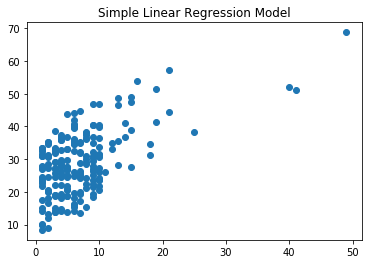

In [13]:
import matplotlib.pyplot as plt
num_friends_good = [49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes_good = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]


alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)
print("alpha = {0}; beta = {1}".format(alpha, beta))

plt.scatter(num_friends_good, daily_minutes_good)
plt.title("Simple Linear Regression Model")
plt.show()

So our model says that we expect a user with `n` friends to spend `22.95 + n * 0.903` minutes on the site each day.  That is, we predict that a user with no friends on the social media site would still spend about 23 minutes a day on the site.  And for each additional friend we expect a user to spend almost a minute more on the site each day.  

The next step is to see how well we've fit the data.  A common measure is the *coefficient of determination* or R-squared, which measures the fraction of the total variation in the dependent variable that is captured by the model:

In [14]:
def total_sum_of_squares(y):
    """the total squared variation of y_i's from their mean"""
    return sum(v ** 2 for v in de_mean(y))

def r_squared(alpha, beta, x, y):
    """the fraction of variation in y captured by the model, which equals
    1 - the fraction of variation in y not captured by the model"""

    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) / total_sum_of_squares(y))

r_squared(alpha, beta, num_friends_good, daily_minutes_good)

0.3291078377836305

Now, we chose the `alpha` and `beta` that minimizes the sum of the squared prediction errors.  One linear model we could have chosen is "always predict `mean(y)`" corresponding to `alpha = mean(y)` and `beta = 0`, whose sum of squared errors exactly equals its total sum of squares.  This means an R-squared of zero, which indicates a model that performs no better than just predicting the mean.

The least squares model must be at least as good as that one, which means the sum of the squared errors is at most the total sum of squares, which means that the R-squared must be at least zero.  And the sum of squared errors must be at least zero, which means that the R-squared can be at most one.

The higher the number, the better our model fits the data.  Here we calculate an R-squared of 0.329, which tells us our model is only sort of okay at fitting the data, and that clearly there are other factors at play.

If we write `theta = [alpha, beta]`, the we can also solve this using gradient descent:

In [15]:
def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, x_i, y_i),       # alpha partial derivative
            -2 * error(alpha, beta, x_i, y_i) * x_i] # beta partial derivative

# choose random value to start
random.seed(0)
theta = [random.random(), random.random()]
alpha, beta = minimize_stochastic(squared_error, squared_error_gradient, num_friends_good, 
                                  daily_minutes_good, theta, 0.0001)

print("alpha = {0}; beta = {1}".format(alpha, beta))

alpha = 22.93746417548679; beta = 0.9043371597664965


Using the same data we get values that are very close to the exact answers.

So why choose least squares?  One justification involves *maximum likelihood estimation*.  Let's say we have a sample of data that comes from a distribution that depends on some unknown parameter:

$$ p(v_1,...,v_n \mid \theta) $$

If we didn't know theta, we could turn around and think of this quantity as the likelihood of $\theta$ given the sample:

$$ L(\theta  \mid v_1,...,v_n) $$

Under this approach, the most likely $\theta$ value is the value that maximizes this likelihood function; that is, the value that makes the observed data the most probable.  In the case of a continuous distributionm in which we have a probability distribution function rather than a probability mass function, we can do the same thing.

One assumtion that's made about the simple regression model is that the regression errors are normally distributed with mean zero and some standard deviation of $\sigma$.  If that's the case, then the likelihood based on seeing a pair `(x_i, y_i)` is:

$$ L(\alpha, \beta \mid x_p y_p \sigma) = \frac {1}{\sqrt 2 \pi \sigma} \exp ( - (y_i - \alpha - \beta x_i ) ^2 /2 \sigma ^2) $$